# EXAMEN FINAL DE IA 2021-0
Crear un archivo ipynb con la solución, el nombre del archivo debe tener el siguiente  formato:

EF[ApellidoPaterno][Nombre] con los datos de uno de los integrantes del grupo. Por ejemplo: EFOreJulio.ipynb

Subir el archivo ipynb. Si trabajó con otro alumno, solamente un alumno debe subir el archivo, no se olvide colocar en el notebook la identificación de cada uno de los alumnos.

Si el tamaño de los datos procesados excede el tamaño, crear un enlace para descargarlo desde el drive.

# INTEGRANTES:
## SALGUERO GINO 
## VASQUEZ MELGAREJO JHONATAN
## VILLEGAS GIANPIERRE ALEXIS

## Importar librerias

** Importe las librerias que generalmente usa para el análisis de datos. **

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Obtener los datos

In [5]:
df_cov = pd.read_excel('BD_coronavirus.xlsx')

**Revise las primeras filas de datos covid, y reviselas con los métodos info() y describe().**

In [6]:
df_cov.head()

,id,edad,sexo,fecha_ini,hospitalizado,evolucion,fiebre,malestar,tos,garganta,...,inmunodeficiencia,renal,hepatico,pulmonar,cancer,otros_comorbilidad,fecha_mue,muestra,prueba,resultado
0,1,40,MASCULINO,17-04-2020,NO,NaN,0,1,1,1,...,0,0,0,0,0,NaN,00-00-0000,NaN,NaN,NaN
1,539,18,FEMENINO,04-09-2020,NO,NaN,1,1,1,0,...,0,0,0,0,0,NaN,10-03-2020,HISOPADO NASAL Y FARINGEO,NaN,NaN
2,681,45,MASCULINO,02-03-2020,SI,RECUPERADO,0,1,0,0,...,0,0,0,0,0,NaN,04-03-2020,HISOPADO NASAL Y FARINGEO,PCR-RT,NEGATIVO
3,692,69,MASCULINO,02-03-2020,NO,RECUPERADO,1,1,1,0,...,0,0,0,0,0,asma,12-03-2020,HISOPADO NASAL Y FARINGEO,NaN,NaN
4,696,67,FEMENINO,10-03-2020,NO,DESCONOCIDO,1,1,1,0,...,0,0,0,0,0,NaN,12-03-2020,HISOPADO NASAL Y FARINGEO,PCR,NEGATIVO


In [7]:
df_cov.describe()

,id,edad,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,...,postparto,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer
count,9.377400e+04,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,...,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000
mean,1.272521e+06,40.055847,0.162966,0.192409,0.259134,0.254068,0.107578,0.080235,0.057244,0.038678,...,0.000821,0.015815,0.014791,0.001290,0.001024,0.000821,0.002986,0.000395,0.002698,0.003125
std,8.312877e+05,16.947560,0.369337,0.394195,0.438161,0.435339,0.309848,0.271659,0.232310,0.192828,...,0.028644,0.124758,0.120716,0.035898,0.031980,0.028644,0.054562,0.019860,0.051872,0.055810
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.310875e+05,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.142626e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.058179e+06,51.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.775205e+06,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93774 entries, 0 to 93773
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  93774 non-null  int64 
 1   edad                93774 non-null  int64 
 2   sexo                93774 non-null  object
 3   fecha_ini           93774 non-null  object
 4   hospitalizado       93774 non-null  object
 5   evolucion           10054 non-null  object
 6   fiebre              93774 non-null  int64 
 7   malestar            93774 non-null  int64 
 8   tos                 93774 non-null  int64 
 9   garganta            93774 non-null  int64 
 10  congestion          93774 non-null  int64 
 11  respiratoria        93774 non-null  int64 
 12  diarrea             93774 non-null  int64 
 13  nauseas             93774 non-null  int64 
 14  cefalea             93774 non-null  int64 
 15  irritabilidad       93774 non-null  int64 
 16  muscular            93

In [9]:
df_cov.columns

Index(['id', 'edad', 'sexo', 'fecha_ini', 'hospitalizado', 'evolucion',
       'fiebre', 'malestar', 'tos', 'garganta', 'congestion', 'respiratoria',
       'diarrea', 'nauseas', 'cefalea', 'irritabilidad', 'muscular',
       'abdominal', 'pecho', 'articulaciones', 'otros_sintomas', 'temperatura',
       'exudado', 'conjuntival', 'convulsion', 'coma', 'disnea',
       'auscultacion', 'rxpulmonar', 'otros_signos', 'embarazo', 'trimestre',
       'postparto', 'cardiovascular', 'diabetes', 'hepatica', 'neurologica',
       'inmunodeficiencia', 'renal', 'hepatico', 'pulmonar', 'cancer',
       'otros_comorbilidad', 'fecha_mue', 'muestra', 'prueba', 'resultado'],
      dtype='object')

# Análisis exploratorio de datos

Hagamos análisis de datos exploratorio, ¡Comenzaremos por verificar los datos que faltan!

## Datos perdidos

¡Podemos usar Seaborn para crear un mapa de calor simple para ver dónde nos faltan datos!

<AxesSubplot:>

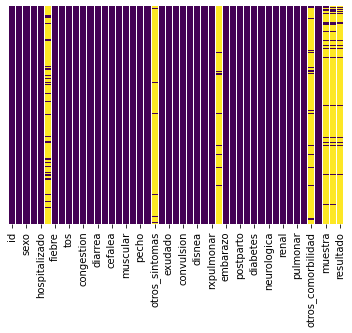

In [10]:
sns.heatmap(df_cov.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='resultado', ylabel='count'>

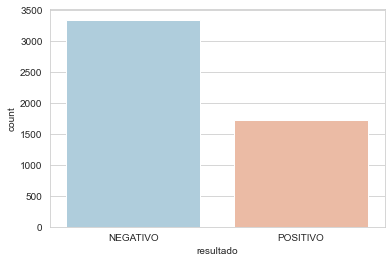

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='resultado',data=df_cov,palette='RdBu_r')

<AxesSubplot:xlabel='resultado', ylabel='count'>

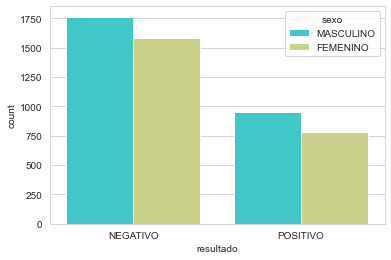

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='resultado',hue='sexo',data=df_cov,palette='rainbow')

<AxesSubplot:xlabel='edad'>

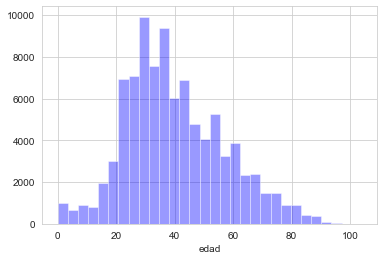

In [17]:
sns.distplot(df_cov['edad'].dropna(),kde=False,color='blue',bins=30)

<AxesSubplot:>

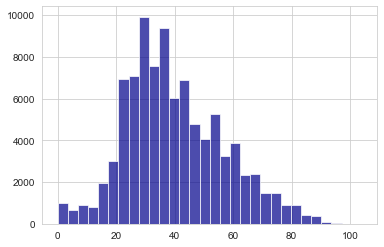

In [18]:
df_cov['edad'].hist(bins=30,color='darkblue',alpha=0.7)

## LIMPIEZA DE DATOS
Primero visualizamos todas las columnas y observamos que existen algunas que cuentan con datos nulos, por eso serán eliminadas.

In [19]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93774 entries, 0 to 93773
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  93774 non-null  int64 
 1   edad                93774 non-null  int64 
 2   sexo                93774 non-null  object
 3   fecha_ini           93774 non-null  object
 4   hospitalizado       93774 non-null  object
 5   evolucion           10054 non-null  object
 6   fiebre              93774 non-null  int64 
 7   malestar            93774 non-null  int64 
 8   tos                 93774 non-null  int64 
 9   garganta            93774 non-null  int64 
 10  congestion          93774 non-null  int64 
 11  respiratoria        93774 non-null  int64 
 12  diarrea             93774 non-null  int64 
 13  nauseas             93774 non-null  int64 
 14  cefalea             93774 non-null  int64 
 15  irritabilidad       93774 non-null  int64 
 16  muscular            93

**Se eliminaran las columnas de id, fecha_ini, hospitalizado, evolucion, otros_sintomas, otros_signos, otros_comorbilidad, fecha_mue, muestra y prueba**

In [20]:
df_cov.drop(['id','fecha_ini','hospitalizado','evolucion','otros_sintomas',
             'otros_signos','otros_comorbilidad','fecha_mue','muestra','prueba',], axis = 'columns', inplace=True)

In [21]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93774 entries, 0 to 93773
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   edad               93774 non-null  int64 
 1   sexo               93774 non-null  object
 2   fiebre             93774 non-null  int64 
 3   malestar           93774 non-null  int64 
 4   tos                93774 non-null  int64 
 5   garganta           93774 non-null  int64 
 6   congestion         93774 non-null  int64 
 7   respiratoria       93774 non-null  int64 
 8   diarrea            93774 non-null  int64 
 9   nauseas            93774 non-null  int64 
 10  cefalea            93774 non-null  int64 
 11  irritabilidad      93774 non-null  int64 
 12  muscular           93774 non-null  int64 
 13  abdominal          93774 non-null  int64 
 14  pecho              93774 non-null  int64 
 15  articulaciones     93774 non-null  int64 
 16  temperatura        93774 non-null  int64

In [22]:
df_cov.head()

,edad,sexo,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,...,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,resultado
0,40,MASCULINO,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,18,FEMENINO,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,45,MASCULINO,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVO
3,69,MASCULINO,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,67,FEMENINO,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,NEGATIVO


In [23]:
df_cov.tail()

,edad,sexo,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,...,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,resultado
93769,31,MASCULINO,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
93770,18,MASCULINO,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
93771,79,FEMENINO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
93772,49,FEMENINO,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
93773,24,FEMENINO,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [24]:
df_cov.dropna(inplace=True)

In [25]:
df_cov.head()

,edad,sexo,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,...,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,resultado
2,45,MASCULINO,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVO
4,67,FEMENINO,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,NEGATIVO
6,61,MASCULINO,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,POSITIVO
8,13,MASCULINO,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVO
9,78,MASCULINO,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVO


## Conversión de características categóricas

Se convertirán a características orgánicas las columnas sexo y resultado.
Se muestran las columnas originales

In [26]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075 entries, 2 to 93730
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   edad               5075 non-null   int64 
 1   sexo               5075 non-null   object
 2   fiebre             5075 non-null   int64 
 3   malestar           5075 non-null   int64 
 4   tos                5075 non-null   int64 
 5   garganta           5075 non-null   int64 
 6   congestion         5075 non-null   int64 
 7   respiratoria       5075 non-null   int64 
 8   diarrea            5075 non-null   int64 
 9   nauseas            5075 non-null   int64 
 10  cefalea            5075 non-null   int64 
 11  irritabilidad      5075 non-null   int64 
 12  muscular           5075 non-null   int64 
 13  abdominal          5075 non-null   int64 
 14  pecho              5075 non-null   int64 
 15  articulaciones     5075 non-null   int64 
 16  temperatura        5075 non-null   int64 

In [27]:
sexo = pd.get_dummies(df_cov['sexo'],drop_first=True)
resultado = pd.get_dummies(df_cov['resultado'],drop_first=True)
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075 entries, 2 to 93730
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   edad               5075 non-null   int64 
 1   sexo               5075 non-null   object
 2   fiebre             5075 non-null   int64 
 3   malestar           5075 non-null   int64 
 4   tos                5075 non-null   int64 
 5   garganta           5075 non-null   int64 
 6   congestion         5075 non-null   int64 
 7   respiratoria       5075 non-null   int64 
 8   diarrea            5075 non-null   int64 
 9   nauseas            5075 non-null   int64 
 10  cefalea            5075 non-null   int64 
 11  irritabilidad      5075 non-null   int64 
 12  muscular           5075 non-null   int64 
 13  abdominal          5075 non-null   int64 
 14  pecho              5075 non-null   int64 
 15  articulaciones     5075 non-null   int64 
 16  temperatura        5075 non-null   int64 

In [28]:
df_cov.drop(['sexo','resultado'],axis=1,inplace=True)
df_cov = pd.concat([df_cov,sexo,resultado],axis=1)
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075 entries, 2 to 93730
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   edad               5075 non-null   int64
 1   fiebre             5075 non-null   int64
 2   malestar           5075 non-null   int64
 3   tos                5075 non-null   int64
 4   garganta           5075 non-null   int64
 5   congestion         5075 non-null   int64
 6   respiratoria       5075 non-null   int64
 7   diarrea            5075 non-null   int64
 8   nauseas            5075 non-null   int64
 9   cefalea            5075 non-null   int64
 10  irritabilidad      5075 non-null   int64
 11  muscular           5075 non-null   int64
 12  abdominal          5075 non-null   int64
 13  pecho              5075 non-null   int64
 14  articulaciones     5075 non-null   int64
 15  temperatura        5075 non-null   int64
 16  exudado            5075 non-null   int64
 17  conjuntival  

In [29]:
df_cov.head(15)

,edad,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,cefalea,...,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,MASCULINO,POSITIVO
2,45,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,67,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6,61,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
8,13,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,78,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,69,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,55,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20,13,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,41,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25,19,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# APLICANDO LOS MODELOS DE CLASIFICACIÓN
Se usarán 4 modelos de clasificación:
1. Regresión Logística
2. K vecinos más cercanos
3. Árboles de Decisión y Bosques Aleatorios
4. Máquinas de Vectores de Soporte

## Regresión Logística

### Construcción del modelo de Regresión Logística
Comencemos dividiendo nuestros datos en un conjunto de entrenamiento y un conjunto de pruebas
#### División de datos de entrenamiento y prueba

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_cov.drop('POSITIVO',axis=1), 
                                                    df_cov['POSITIVO'], test_size=0.33, 
                                                    random_state=100)

### Entrenamiento y predicción

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression(max_iter=10000,solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [34]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [35]:
y_test

39068    1
2697     0
31399    1
41494    0
13349    0
        ..
9483     0
11095    1
58393    1
21993    0
10592    0
Name: POSITIVO, Length: 1675, dtype: uint8

In [36]:
X_test

,edad,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,cefalea,...,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,MASCULINO
39068,24,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2697,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31399,47,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
41494,40,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13349,29,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9483,57,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11095,26,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
58393,24,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21993,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Evaluación
¡Podemos verificar la precisión, recuperación, puntaje f1 usando el informe de clasificación!

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,predictions)

array([[969, 133],
       [358, 215]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80      1102
           1       0.62      0.38      0.47       573

    accuracy                           0.71      1675
   macro avg       0.67      0.63      0.63      1675
weighted avg       0.69      0.71      0.68      1675



**Usando el modelo de regresión logística se obtiene un acurracy de 71% y una precision del 62% para detectar los positivos y 73% para los negativos**

## K vecinos más cercanos

### Uso de KNN (K vecinos más cercanos)
Recuerde que estamos tratando de encontrar un modelo para predecir si algo es TARGET CLASS o no. Comenzaremos con k = 1.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predicciones y Evaluaciones

¡Evaluemos nuestro modelo KNN!

In [45]:
pred = knn.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test,pred))

[[816 286]
 [361 212]]


In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1102
           1       0.43      0.37      0.40       573

    accuracy                           0.61      1675
   macro avg       0.56      0.56      0.56      1675
weighted avg       0.60      0.61      0.61      1675



**Se obtiene**

### Elegir un valor K
¡Avancemos y usemos el método del codo para elegir un buen valor K!

**Cree un bucle for que entrene varios modelos KNN con diferentes valores k, luego realice un seguimiento de tasa_erro para cada uno de estos modelos con una lista. Consulte el ejemplo si está confundido en este paso.**

In [49]:
tasa_error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de Error')

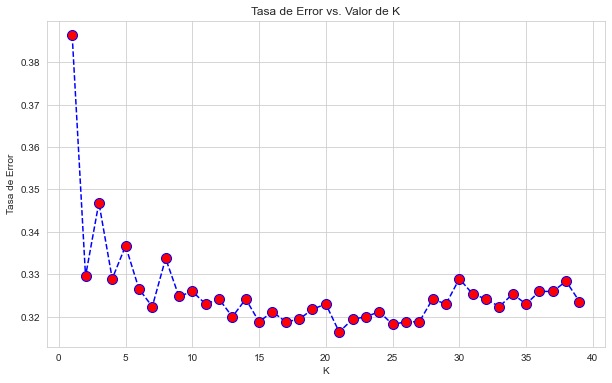

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

In [51]:
# CON K=21
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=21


[[1042   60]
 [ 470  103]]


              precision    recall  f1-score   support

           0       0.69      0.95      0.80      1102
           1       0.63      0.18      0.28       573

    accuracy                           0.68      1675
   macro avg       0.66      0.56      0.54      1675
weighted avg       0.67      0.68      0.62      1675



## Árboles de decisión y bosques aleatorios

Comenzaremos simplemente entrenando un solo árbol de decisión.

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=101)

In [54]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

### Predicción y Evaluación¶
Evaluemos nuestro árbol de decisiones.

In [55]:
predictions = dtree.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1102
           1       0.44      0.40      0.42       573

    accuracy                           0.62      1675
   macro avg       0.57      0.57      0.57      1675
weighted avg       0.61      0.62      0.62      1675



In [58]:
print(confusion_matrix(y_test,predictions))

[[811 291]
 [342 231]]


### Bosques Aleatorios

Ahora comparemos el modelo de árbol de decisión con un bosque aleatorio.

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=101,criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [60]:
rfc_pred = rfc.predict(X_test)

In [61]:
print(confusion_matrix(y_test,rfc_pred))

[[855 247]
 [324 249]]


In [62]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1102
           1       0.50      0.43      0.47       573

    accuracy                           0.66      1675
   macro avg       0.61      0.61      0.61      1675
weighted avg       0.65      0.66      0.65      1675



## Máquinas con Vectores de Soporte


### Entrenar el clasificador con Vectores de Soporte

In [63]:
from sklearn.svm import SVC

In [64]:
model = SVC()

In [65]:
model.fit(X_train,y_train)

SVC()

### Predicciones y evaluaciones

Ahora vamos a predecir haciendo uso del modelo entrenado.

In [66]:
predictions = model.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(confusion_matrix(y_test,predictions))

[[1102    0]
 [ 573    0]]


In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79      1102
           1       0.00      0.00      0.00       573

    accuracy                           0.66      1675
   macro avg       0.33      0.50      0.40      1675
weighted avg       0.43      0.66      0.52      1675



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gridsearch
Encontrar los parámetros correctos (como qué valores de C o gamma usar) es una tarea difícil. Pero afortunadamente, podemos probar un montón de combinaciones y ver qué funciona mejor. Esta idea de crear una "cuadrícula" de parámetros y simplemente probar todas las combinaciones posibles se llama Gridsearch, este método es lo suficientemente común como para que Scikit-learn tenga esta funcionalidad incorporada con GridSearchCV. El CV significa validación cruzada.

GridSearchCV toma un diccionario que describe los parámetros que se deben probar y un modelo para entrenar. La cuadricula de parámetros se define como un diccionario, donde las claves son los parámetros y los valores son las configuraciones que se probarán.

In [70]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [73]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.659, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.659, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.659, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.660, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.660, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.659, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.659, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.659, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.660, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.694, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.701, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.663, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.681, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.690, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.693, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.687, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.668, total=   3.9s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.688, total=   2.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.706, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.700, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.684, total=   0.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.669, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.679, total=   1.4s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.6min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [74]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [75]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [76]:
grid_predictions = grid.predict(X_test)

In [77]:
print(confusion_matrix(y_test,grid_predictions))

[[1025   77]
 [ 437  136]]


In [78]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1102
           1       0.64      0.24      0.35       573

    accuracy                           0.69      1675
   macro avg       0.67      0.58      0.57      1675
weighted avg       0.68      0.69      0.64      1675



**Se concluye que es preferible usar el algoritmo clasificación de regresión logística puesto que consigue el accuracy más alto con un valor de 71%**

## Aplicando CLUSTERING

### Agrupamiento K Means con Python

Agrupamiento K Means es un algoritmo de aprendizaje no supervisado que intenta agrupar los datos en función de su similitud. El aprendizaje no supervisado significa que no hay ningún resultado que predecir, y el algoritmo simplemente trata de encontrar patrones en los datos. En el agrupamiento K Means, tenemos que especificar el número de clusters en los que queremos agrupar los datos. El algoritmo asigna aleatoriamente cada observación a un clúster y encuentra el centroide de cada clúster. Luego, el algoritmo itera a través de dos pasos:
Reasigna los puntos de datos al clúster cuyo centroide es el más cercano. Calcula el nuevo centroide de cada grupo. Estos dos pasos se repiten hasta que la variación dentro del clúster no se puede reducir más. La variación dentro del clúster se calcula como la suma de la distancia euclidiana entre los puntos de datos y sus respectivos centroides de clúster.

In [79]:
df = df_cov

In [80]:
df.drop(['POSITIVO',], axis = 'columns', inplace=True)
df

,edad,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,cefalea,...,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,MASCULINO
2,45,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,67,1,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
6,61,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,13,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,78,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93717,28,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93721,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93724,37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
93727,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Se debe convertir el dataframe a un arreglo usando el método to_numpy()**

In [81]:
arr = df.to_numpy()
arrno = arr
arr

array([[45,  0,  1, ...,  0,  0,  1],
       [67,  1,  1, ...,  0,  0,  0],
       [61,  0,  0, ...,  0,  0,  1],
       ...,
       [37,  0,  0, ...,  0,  0,  1],
       [28,  0,  0, ...,  0,  0,  1],
       [27,  0,  0, ...,  0,  0,  1]], dtype=int64)

### Creación de Clústeres

In [82]:
from sklearn.cluster import KMeans

In [83]:
kmeans = KMeans(n_clusters=4)

In [84]:
kmeans.fit(arr)

KMeans(n_clusters=4)

In [85]:
kmeans.cluster_centers_

array([[ 5.78253165e+01,  3.06329114e-01,  3.67088608e-01,
         5.51265823e-01,  5.17088608e-01,  2.22784810e-01,
         1.72151899e-01,  8.03797468e-02,  4.87341772e-02,
         3.41139241e-01,  1.26582278e-02,  1.72784810e-01,
         2.21518987e-02,  1.55696203e-01,  4.36708861e-02,
         3.66386076e+01,  2.91139241e-02,  3.79746835e-03,
         6.50521303e-19,  1.26582278e-03,  1.89873418e-02,
         2.84810127e-02,  2.34177215e-02,  1.26582278e-03,
         1.89873418e-03, -6.28837260e-18,  5.63291139e-02,
         4.05063291e-02,  2.53164557e-03,  1.89873418e-03,
         2.53164557e-03,  5.06329114e-03,  0.00000000e+00,
         1.01265823e-02,  1.32911392e-02,  5.22784810e-01],
       [ 3.65000000e+01,  0.00000000e+00,  0.00000000e+00,
         5.00000000e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e-01,  0.00000000e+

In [86]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [87]:
arr

array([[45,  0,  1, ...,  0,  0,  1],
       [67,  1,  1, ...,  0,  0,  0],
       [61,  0,  0, ...,  0,  0,  1],
       ...,
       [37,  0,  0, ...,  0,  0,  1],
       [28,  0,  0, ...,  0,  0,  1],
       [27,  0,  0, ...,  0,  0,  1]], dtype=int64)

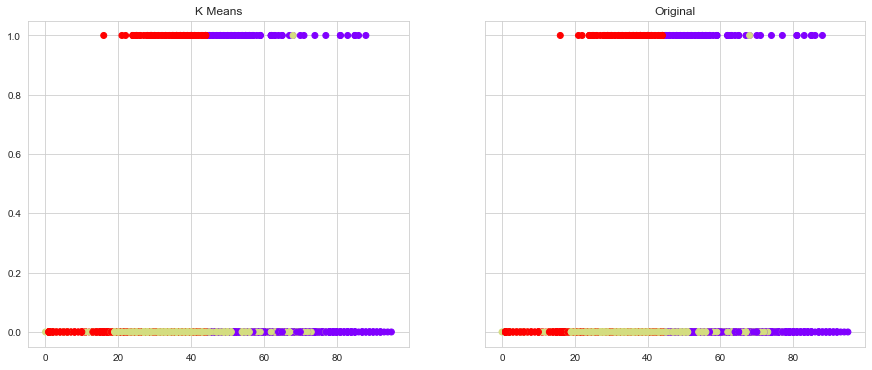

In [88]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,6))
ax1.set_title('K Means')
ax1.scatter(arr[:,0],arr[:,14],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(arrno[:,0],arrno[:,14],c=kmeans.labels_,cmap='rainbow')